## Autoregressive Moving Average (ARMA) models

### Importing the relevant packages

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.arima_model import ARMA 
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns 
sns.set()

### Importing the Data and Pre-processing

In [6]:
raw_csv_data = pd.read_csv('../datasets/Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq("b")
df_comp = df_comp.fillna(method='ffill')

In [7]:
df_comp['market_value'] = df_comp.ftse

In [8]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [10]:
df['returns']=df.market_value.pct_change(1).mul(100)

/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### ARMA(1,1)

In [11]:
model_return_ar_1_ma_1 = ARMA(df.returns[1:], order=(1,1))
results_ret_ar_1_ma_1 = model_return_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Fri, 25 Oct 2019   AIC                          15841.000
Time:                        14:58:08   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -13.406      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
MA.1            1.2284           +0.0000j            1.2284            0.0000
-----------------------------------------------------------------------------
"""

### LLR Test

In [20]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit(trend = 'nc').llf
    L2 = mod_2.fit(trend = 'nc').llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p 

In [21]:
model_ret_ar_1 = ARMA(df.returns[1:], order = (1,0))
model_ret_ma_1 = ARMA(df.returns[1:], order = (0,1))

In [22]:
print('\nARIMA vs AR ', LLR_test(model_ret_ar_1, model_return_ar_1_ma_1))
print('\nARIMA vs MA ', LLR_test(model_ret_ma_1, model_return_ar_1_ma_1))


ARIMA vs AR  0.0

ARIMA vs MA  0.0


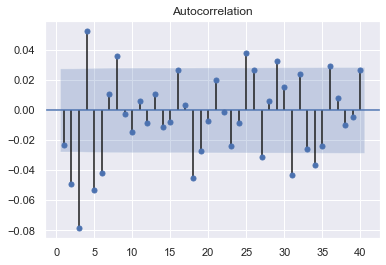

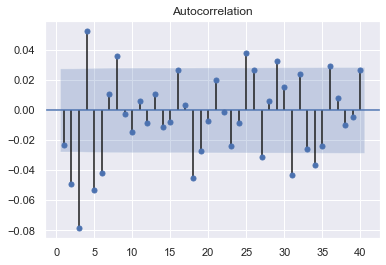

In [25]:
sgt.plot_acf(df.returns[1:], zero = False, lags=40)

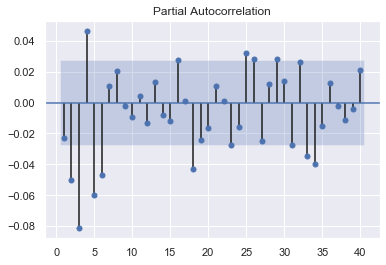

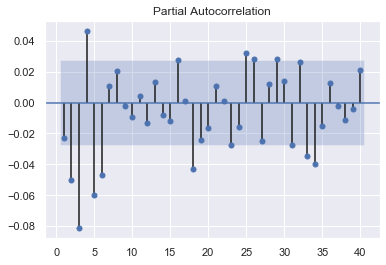

In [26]:
sgt.plot_pacf(df.returns[1:], zero=False, lags=40)

### Higher-Lag ARMA Models

In [27]:
model_ret_ar_3_ma_3 = ARMA(df.returns[1:], order=(3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()

In [29]:
LLR_test(model_return_ar_1_ma_1, model_ret_ar_3_ma_3, DF = 4)

0.0

In [32]:
# results_ret_ar_3_ma_3.summary()

In [33]:
model_ret_ar_3_ma_2 = ARMA(df.returns[1:], order=(3,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 2)   Log Likelihood               -7895.747
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 25 Oct 2019   AIC                          15805.495
Time:                        15:46:34   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.251      0.211      -0.011       0.048
ar.L1.returns    -0.6785      0.087     -7.799      0.000      -0.849      -0.508
ar.L2.returns    -0.5088      0.139     -3.670      0.000      -0.780      -0.237
ar.L3.returns    -0.1141      0.015     -7.655      0.000      -0.143      -0.085
ma.L1.returns     0.6568      0.087      7.536      0.000       0.486       0.828
ma.L2.returns     0.4474      0.141      3.175      0.002       0.171       0.724
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4929           -1.5101j            1.5885           -0.3002
AR.2           -0.4929           +1.5101j            1.5885            0.3002
AR.3           -3.4748           -0.0000j            3.4748           -0.5000
MA.1           -0.7340           -1.3025j            1.4951           -0.3317
MA.2           -0.7340           +1.3025j            1.4951            0.3317
-----------------------------------------------------------------------------
"""

In [34]:
model_ret_ar_2_ma_3 = ARMA(df.returns[1:], order=(2,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
results_ret_ar_2_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 3)   Log Likelihood               -7895.587
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 25 Oct 2019   AIC                          15805.174
Time:                        15:47:29   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.276      0.202      -0.010       0.048
ar.L1.returns    -0.5605      0.090     -6.245      0.000      -0.736      -0.385
ar.L2.returns    -0.4187      0.193     -2.172      0.030      -0.797      -0.041
ma.L1.returns     0.5378      0.090      6.000      0.000       0.362       0.714
ma.L2.returns     0.3540      0.195      1.818      0.069      -0.028       0.736
ma.L3.returns    -0.1158      0.016     -7.369      0.000      -0.147      -0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6694           -1.3930j            1.5455           -0.3213
AR.2           -0.6694           +1.3930j            1.5455            0.3213
MA.1           -0.7270           -1.1772j            1.3836           -0.3381
MA.2           -0.7270           +1.1772j            1.3836            0.3381
MA.3            4.5096           -0.0000j            4.5096           -0.0000
-----------------------------------------------------------------------------
"""

In [35]:
model_ret_ar_3_ma_1 = ARMA(df.returns[1:], order=(3,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 1)   Log Likelihood               -7899.072
Method:                       css-mle   S.D. of innovations              1.167
Date:                Fri, 25 Oct 2019   AIC                          15810.144
Time:                        15:51:38   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.298      0.194      -0.010       0.047
ar.L1.returns    -0.5077      0.088     -5.769      0.000      -0.680      -0.335
ar.L2.returns    -0.0638      0.016     -4.023      0.000      -0.095      -0.033
ar.L3.returns    -0.1102      0.014     -7.850      0.000      -0.138      -0.083
ma.L1.returns     0.4838      0.088      5.500      0.000       0.311       0.656
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5095           -0.0000j            1.5095           -0.5000
AR.2            0.4653           -2.4076j            2.4521           -0.2196
AR.3            0.4653           +2.4076j            2.4521            0.2196
MA.1           -2.0668           +0.0000j            2.0668            0.5000
-----------------------------------------------------------------------------
"""

In [38]:
LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2, DF = 1)

0.009

### Residuals For Returns

In [42]:
df['res_return_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]

/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


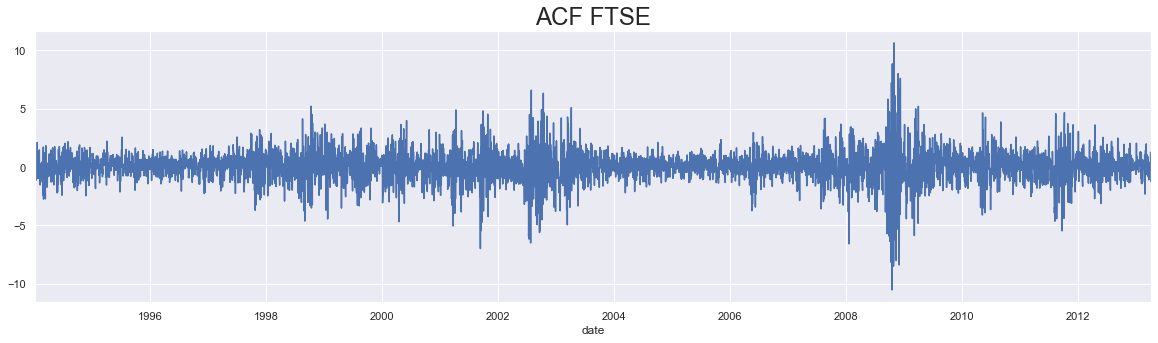

In [43]:
df.res_return_ar_3_ma_2.plot(figsize=(20,5))
plt.title("Residuals for Returns", size=24)
plt.show()

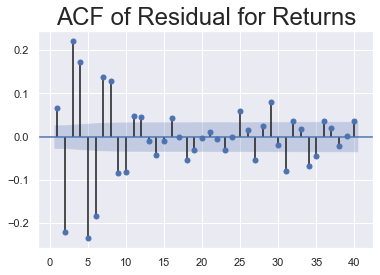

In [62]:
sgt.plot_acf(df.res_return_ar_3_ma_2[2::], zero=False, lags=40)
plt.title("ACF of Residual for Returns", size=24)
plt.show()

In [45]:
model_ret_ar_5_ma_1 = ARMA(df.returns[1:], order=(5,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 1)   Log Likelihood               -7889.311
Method:                       css-mle   S.D. of innovations              1.165
Date:                Fri, 25 Oct 2019   AIC                          15794.623
Time:                        16:19:15   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.407      0.159      -0.007       0.045
ar.L1.returns     0.3440      0.131      2.624      0.009       0.087       0.601
ar.L2.returns    -0.0458      0.015     -3.005      0.003      -0.076      -0.016
ar.L3.returns    -0.0652      0.016     -4.010      0.000      -0.097      -0.033
ar.L4.returns     0.0741      0.018      4.068      0.000       0.038       0.110
ar.L5.returns    -0.0813      0.014     -5.688      0.000      -0.109      -0.053
ma.L1.returns    -0.3673      0.131     -2.801      0.005      -0.624      -0.110
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6158           -0.0000j            1.6158           -0.5000
AR.2            1.3793           -0.8613j            1.6261           -0.0888
AR.3            1.3793           +0.8613j            1.6261            0.0888
AR.4           -0.1156           -1.6929j            1.6968           -0.2608
AR.5           -0.1156           +1.6929j            1.6968            0.2608
MA.1            2.7223           +0.0000j            2.7223            0.0000
-----------------------------------------------------------------------------
"""

### Residuals for the New Model

In [46]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid

/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


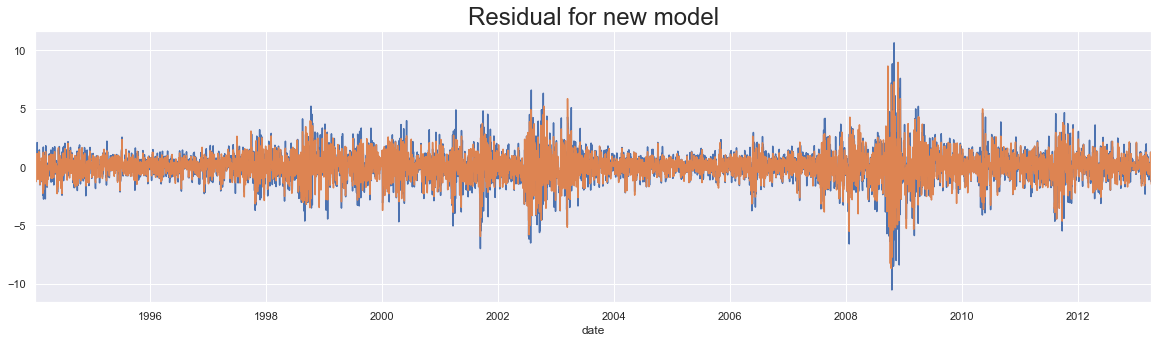

In [49]:

df.res_return_ar_3_ma_2.plot(figsize=(20,5))
df.res_ret_ar_5_ma_1.plot(figsize=(20,5))
plt.title("Residual for new model", size=24)
plt.show()

In [56]:
print(round(df.res_ret_ar_5_ma_1.mean(),3))
print(round(df.res_ret_ar_5_ma_1.std(),3))

-0.0
1.165


In [59]:
print(round(df.res_return_ar_3_ma_2.mean(),3))
print(round(df.res_return_ar_3_ma_2.std(),3))

0.027
1.38


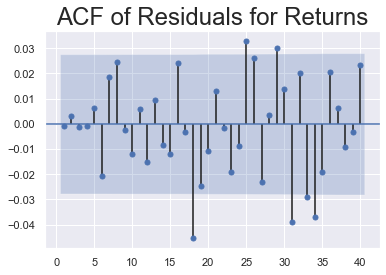

In [60]:
sgt.plot_acf(df.res_ret_ar_5_ma_1[1:], zero=False, lags=40)
plt.title("ACF of Residuals for Returns", size=24)
plt.show()

### ARMA Models for Prices

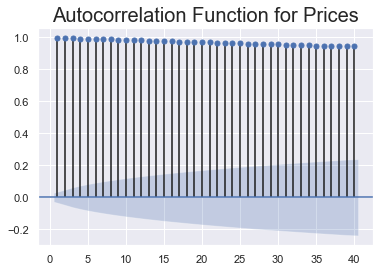

In [63]:
sgt.plot_acf(df.market_value, unbiased=True, zero = False, lags = 40)
plt.title("Autocorrelation Function for Prices", size=20)
plt.show()

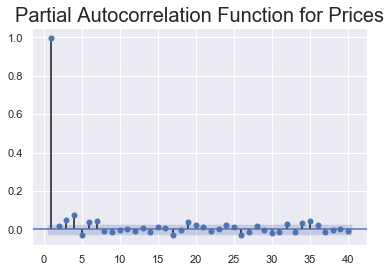

In [65]:
sgt.plot_pacf(df.market_value, zero = False, lags = 40, method = ('ols'))
plt.title("Partial Autocorrelation Function for Prices", size=20)
plt.show()

In [66]:
model_ar_1_ma_1 = ARMA(df.market_value, order=(1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 1)   Log Likelihood              -27621.789
Method:                       css-mle   S.D. of innovations             59.248
Date:                Fri, 25 Oct 2019   AIC                          55251.579
Time:                        16:43:03   BIC                          55277.664
Sample:                    01-07-1994   HQIC                         55260.719
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6411    496.798     10.245      0.000    4115.936    6063.347
ar.L1.market_value     0.9985      0.001   1323.200      0.000       0.997       1.000
ma.L1.market_value    -0.0190      0.015     -1.274      0.203      -0.048       0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
MA.1           52.5187           +0.0000j           52.5187            0.0000
-----------------------------------------------------------------------------
"""

In [67]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


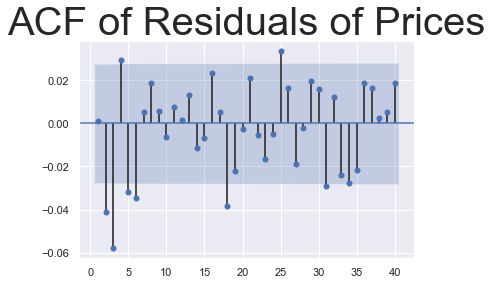

In [68]:
sgt.plot_acf(df.res_ar_1_ma_1, zero=False,lags = 40)
plt.title("ACF of Residuals of Prices", size=40)
plt.show()

In [70]:
model_ar_6_ma_6 = ARMA(df.market_value, order=(6,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit(start_ar_lags = 11)
results_ar_6_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 6)   Log Likelihood              -27587.932
Method:                       css-mle   S.D. of innovations             58.849
Date:                Fri, 25 Oct 2019   AIC                          55203.864
Time:                        16:49:01   BIC                          55295.164
Sample:                    01-07-1994   HQIC                         55235.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6478    568.080      8.959      0.000    3976.232    6203.064
ar.L1.market_value     1.9276      0.032     59.943      0.000       1.865       1.991
ar.L2.market_value    -1.7361      0.040    -43.400      0.000      -1.815      -1.658
ar.L3.market_value     1.2681      0.034     36.860      0.000       1.201       1.335
ar.L4.market_value    -0.2377      0.156     -1.520      0.128      -0.544       0.069
ar.L5.market_value    -0.4060      0.164     -2.482      0.013      -0.727      -0.085
ar.L6.market_value     0.1838      0.049      3.769      0.000       0.088       0.279
ma.L1.market_value    -0.9487      0.035    -27.048      0.000      -1.017      -0.880
ma.L2.market_value     0.7801      0.032     24.213      0.000       0.717       0.843
ma.L3.market_value    -0.5087      0.031    -16.338      0.000      -0.570      -0.448
ma.L4.market_value    -0.1560      0.157     -0.994      0.320      -0.464       0.152
ma.L5.market_value     0.0951      0.057      1.679      0.093      -0.016       0.206
ma.L6.market_value     0.0670      0.024      2.820      0.005       0.020       0.114
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0857           -1.0502j            1.0537           -0.2370
AR.2            0.0857           +1.0502j            1.0537            0.2370
AR.3           -2.0263           -0.0000j            2.0263           -0.5000
AR.4            1.0011           -0.0000j            1.0011           -0.0000
AR.5            1.5313           -0.2660j            1.5542           -0.0274
AR.6            1.5313           +0.2660j            1.5542            0.0274
MA.1            0.1028           -1.0612j            1.0661           -0.2346
MA.2            0.1028           +1.0612j            1.0661            0.2346
MA.3            1.3625           -0.2792j            1.3908           -0.0322
MA.4            1.3625           +0.2792j            1.3908            0.0322
MA.5           -2.1745           -1.4344j            2.6050           -0.4072
MA.6           -2.1745           +1.4344j            2.6050            0.4072
-----------------------------------------------------------------------------
"""

In [71]:
model_ar_5_ma_6 = ARMA(df.market_value, order=(5,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit(start_ar_lags = 7)
results_ar_5_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 6)   Log Likelihood              -27587.863
Method:                       css-mle   S.D. of innovations             58.849
Date:                Fri, 25 Oct 2019   AIC                          55201.726
Time:                        16:51:26   BIC                          55286.504
Sample:                    01-07-1994   HQIC                         55231.433
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6480    580.795      8.763      0.000    3951.310    6227.986
ar.L1.market_value     1.3583      0.178      7.642      0.000       1.010       1.707
ar.L2.market_value    -1.1288      0.238     -4.753      0.000      -1.594      -0.663
ar.L3.market_value     0.9146      0.229      3.994      0.000       0.466       1.363
ar.L4.market_value     0.0160      0.204      0.078      0.937      -0.384       0.416
ar.L5.market_value    -0.1613      0.119     -1.351      0.177      -0.395       0.073
ma.L1.market_value    -0.3794      0.178     -2.129      0.033      -0.729      -0.030
ma.L2.market_value     0.7294      0.125      5.826      0.000       0.484       0.975
ma.L3.market_value    -0.2196      0.153     -1.435      0.151      -0.520       0.080
ma.L4.market_value    -0.1387      0.114     -1.215      0.225      -0.363       0.085
ma.L5.market_value    -0.0879      0.017     -5.325      0.000      -0.120      -0.056
ma.L6.market_value     0.0265      0.024      1.127      0.260      -0.020       0.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0917           -1.0418j            1.0458           -0.2360
AR.2            0.0917           +1.0418j            1.0458            0.2360
AR.3            1.0010           -0.0000j            1.0010           -0.0000
AR.4            1.8983           -0.0000j            1.8983           -0.0000
AR.5           -2.9835           -0.0000j            2.9835           -0.5000
MA.1            0.1071           -1.0487j            1.0542           -0.2338
MA.2            0.1071           +1.0487j            1.0542            0.2338
MA.3           -1.5354           -1.5156j            2.1574           -0.3760
MA.4           -1.5354           +1.5156j            2.1574            0.3760
MA.5            1.5920           -0.0000j            1.5920           -0.0000
MA.6            4.5799           -0.0000j            4.5799           -0.0000
-----------------------------------------------------------------------------
"""

In [72]:
model_ar_6_ma_1 = ARMA(df.market_value, order=(6,1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit(start_ar_lags = 7)
results_ar_6_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 1)   Log Likelihood              -27594.195
Method:                       css-mle   S.D. of innovations             58.923
Date:                Fri, 25 Oct 2019   AIC                          55206.389
Time:                        16:52:46   BIC                          55265.082
Sample:                    01-07-1994   HQIC                         55226.956
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6416    586.494      8.678      0.000    3940.134    6239.149
ar.L1.market_value     1.3921      0.058     23.930      0.000       1.278       1.506
ar.L2.market_value    -0.4369      0.059     -7.400      0.000      -0.553      -0.321
ar.L3.market_value    -0.0101      0.025     -0.409      0.683      -0.059       0.038
ar.L4.market_value     0.1126      0.025      4.527      0.000       0.064       0.161
ar.L5.market_value    -0.1158      0.025     -4.717      0.000      -0.164      -0.068
ar.L6.market_value     0.0573      0.014      4.067      0.000       0.030       0.085
ma.L1.market_value    -0.4127      0.060     -6.925      0.000      -0.529      -0.296
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2           -1.7608           -0.0000j            1.7608           -0.5000
AR.3           -0.0803           -1.8407j            1.8425           -0.2569
AR.4           -0.0803           +1.8407j            1.8425            0.2569
AR.5            1.4694           -0.8691j            1.7072           -0.0850
AR.6            1.4694           +0.8691j            1.7072            0.0850
MA.1            2.4233           +0.0000j            2.4233            0.0000
-----------------------------------------------------------------------------
"""

In [74]:
print("ARMA(5,6): \t LL = ", results_ar_5_ma_6.llf, "\t AIC = ", results_ar_5_ma_6.aic)
print("ARMA(6,1): \t LL = ", results_ar_6_ma_1.llf, "\t AIC = ", results_ar_6_ma_1.aic)

ARMA(5,6): 	 LL =  -27587.862948958704 	 AIC =  55201.72589791741
ARMA(6,1): 	 LL =  -27594.19457090337 	 AIC =  55206.38914180674


/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


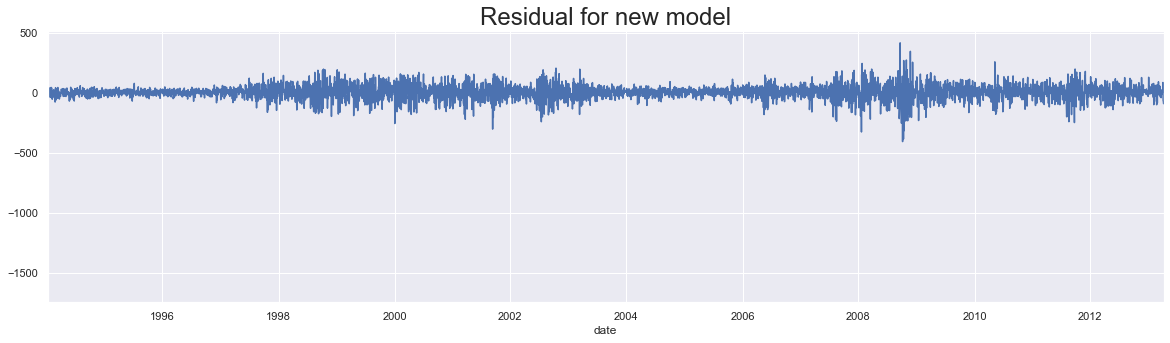

In [76]:
df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid


plt.title("Residual for new model", size=24)
plt.show()

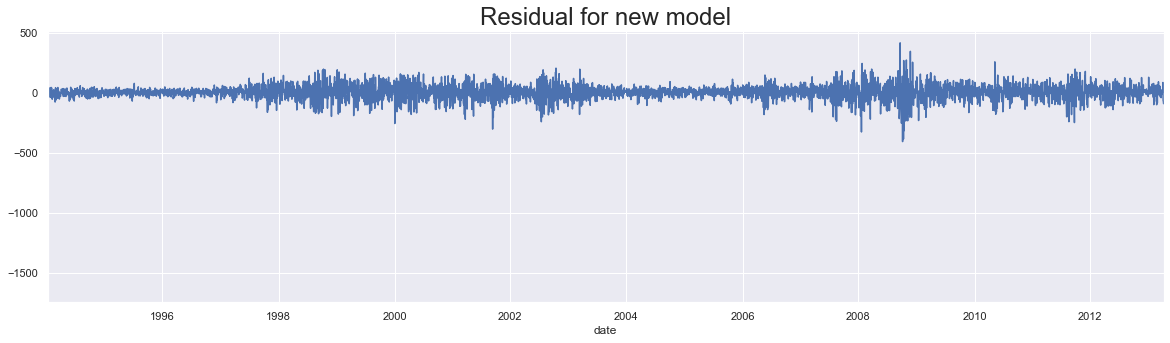

In [78]:
df.res_ar_5_ma_6.plot(figsize=(20,5))

plt.title("Residual for new model", size=24)
plt.show()

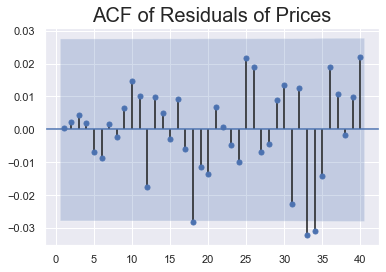

In [79]:
sgt.plot_acf(df.res_ar_5_ma_6, zero=False, lags=40)
plt.title("ACF of Residuals of Prices", size=20)
plt.show()

In [81]:
df_test.market_value[:5]

date
2013-04-08    6276.94
2013-04-09    6313.20
2013-04-10    6387.37
2013-04-11    6416.14
2013-04-12    6384.39
Freq: B, Name: market_value, dtype: float64

In [93]:
df.tail()

,market_value,returns,res_return_ar_3_ma_2,res_ret_ar_5_ma_1,res_ar_1_ma_1,res_ar_5_ma_6
date,,,,,,
2013-04-01,6411.74,0.000000,-0.065253,-0.052616,1.985034,-0.460198
2013-04-02,6490.66,1.230867,1.249245,1.262004,80.896525,83.901021
2013-04-03,6420.28,-1.084327,-0.922168,-1.101920,-66.785207,-66.320370
2013-04-04,6344.11,-1.186397,-1.256534,-1.145583,-75.490395,-72.497040
2013-04-05,6249.77,-1.487049,-1.111828,-1.483761,-93.937845,-92.464018


In [105]:
df_test['forecast'] = results_ar_5_ma_6.predict(start='2013-04-08', end='2018-01-29')

/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


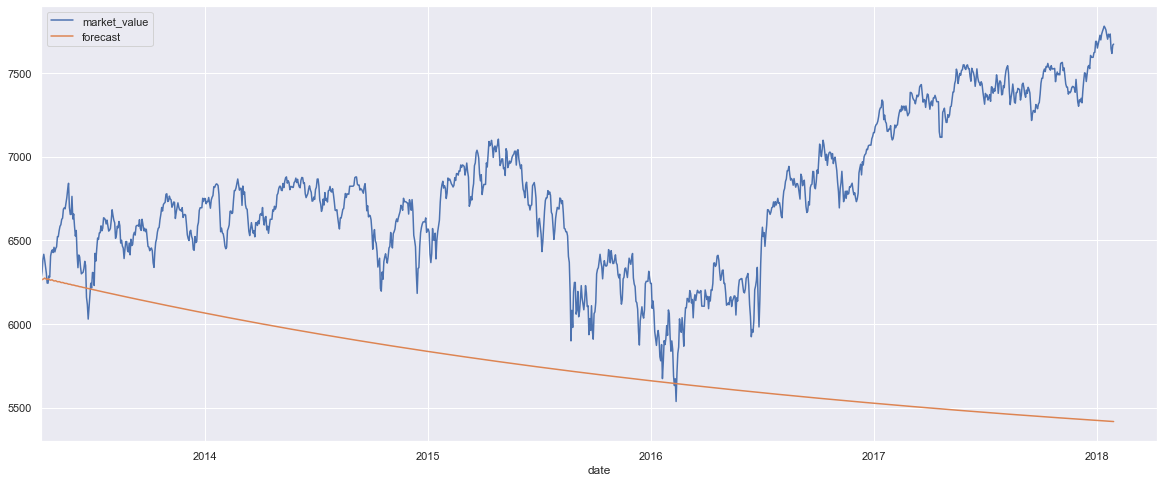

In [107]:
df_test[['market_value','forecast']].plot(xlim=['2013-04-08','2018-04-10'],figsize=(20,8))

In [95]:
df.columns

Index(['market_value', 'returns', 'res_return_ar_3_ma_2', 'res_ret_ar_5_ma_1',
       'res_ar_1_ma_1', 'res_ar_5_ma_6', 'forecast'],
      dtype='object')

In [103]:
df_test.tail()

,market_value
date,
2018-01-23,7731.827774
2018-01-24,7643.428966
2018-01-25,7615.839954
2018-01-26,7665.541292
2018-01-29,7671.533300
